In [2]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 15.6 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn] [scikit-learn]


In [8]:
!pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [17]:
path = "/Users/payalkshirsagar/Downloads/Content/Linear Regression Assignment/f4aa1250-3c0a-480b-bd6b-c953fa0e987c-College.xlsx"

df = pd.read_excel(path)

In [11]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [12]:
df.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [13]:
df.info

<bound method DataFrame.info of                          Unnamed: 0 Private   Apps  Accept  Enroll  Top10perc  \
0      Abilene Christian University     Yes   1660    1232     721         23   
1                Adelphi University     Yes   2186    1924     512         16   
2                    Adrian College     Yes   1428    1097     336         22   
3               Agnes Scott College     Yes    417     349     137         60   
4         Alaska Pacific University     Yes    193     146      55         16   
..                              ...     ...    ...     ...     ...        ...   
772         Worcester State College      No   2197    1515     543          4   
773               Xavier University     Yes   1959    1805     695         24   
774  Xavier University of Louisiana     Yes   2097    1915     695         34   
775                 Yale University     Yes  10705    2453    1317         95   
776    York College of Pennsylvania     Yes   2989    1855     691         28

In [18]:
df = df.drop(columns=['Unnamed: 0'])

In [19]:
df = pd.get_dummies(df, columns=['Private'], drop_first=True)

In [20]:
desc_stats = df.describe().round(2)
print(desc_stats)


           Apps    Accept   Enroll  Top10perc  Top25perc  F.Undergrad  \
count    777.00    777.00   777.00     777.00      777.0       777.00   
mean    3001.64   2018.80   779.97      27.56       55.8      3699.91   
std     3870.20   2451.11   929.18      17.64       19.8      4850.42   
min       81.00     72.00    35.00       1.00        9.0       139.00   
25%      776.00    604.00   242.00      15.00       41.0       992.00   
50%     1558.00   1110.00   434.00      23.00       54.0      1707.00   
75%     3624.00   2424.00   902.00      35.00       69.0      4005.00   
max    48094.00  26330.00  6392.00      96.00      100.0     31643.00   

       P.Undergrad  Outstate  Room.Board    Books  Personal     PhD  Terminal  \
count       777.00    777.00      777.00   777.00    777.00  777.00    777.00   
mean        855.30  10440.67     4357.53   549.38   1340.64   72.66     79.70   
std        1522.43   4023.02     1096.70   165.11    677.07   16.33     14.72   
min           1.00

In [21]:
X = df.drop(columns=['Grad.Rate'])
y = df['Grad.Rate']


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.30, 
    random_state=42
)


In [23]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
coef = pd.Series(model.coef_, index=X.columns).round(2)
print("Intercept:", round(model.intercept_, 2))
print("\nCoefficients:\n", coef)


Intercept: 34.94

Coefficients:
 Apps           0.00
Accept        -0.00
Enroll         0.00
Top10perc      0.03
Top25perc      0.14
F.Undergrad   -0.00
P.Undergrad   -0.00
Outstate       0.00
Room.Board     0.00
Books         -0.00
Personal      -0.00
PhD            0.14
Terminal      -0.11
S.F.Ratio     -0.03
perc.alumni    0.34
Expend        -0.00
Private_Yes    5.05
dtype: float64


In [25]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [26]:
train_r2 = round(metrics.r2_score(y_train, y_train_pred), 2)
train_mse = round(metrics.mean_squared_error(y_train, y_train_pred), 2)
train_mae = round(metrics.mean_absolute_error(y_train, y_train_pred), 2)


In [27]:
test_r2 = round(metrics.r2_score(y_test, y_test_pred), 2)
test_mse = round(metrics.mean_squared_error(y_test, y_test_pred), 2)
test_mae = round(metrics.mean_absolute_error(y_test, y_test_pred), 2)


In [28]:
print("\nTRAINING METRICS")
print("R²:", train_r2)
print("MSE:", train_mse)
print("MAE:", train_mae)

print("\nTESTING METRICS")
print("R²:", test_r2)
print("MSE:", test_mse)
print("MAE:", test_mae)



TRAINING METRICS
R²: 0.46
MSE: 160.59
MAE: 9.37

TESTING METRICS
R²: 0.44
MSE: 160.48
MAE: 9.6


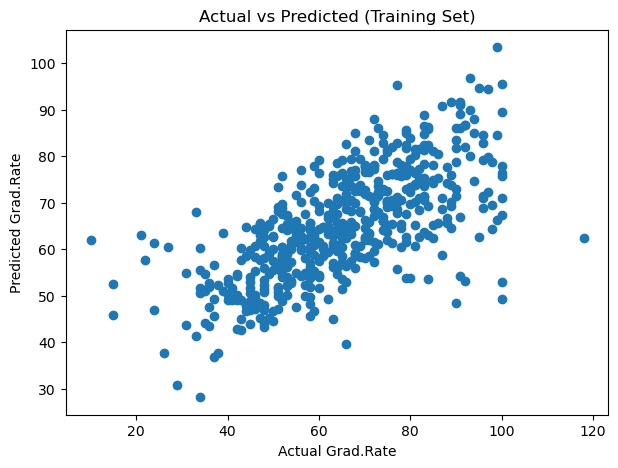

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Grad.Rate")
plt.ylabel("Predicted Grad.Rate")
plt.title("Actual vs Predicted (Training Set)")
plt.show()


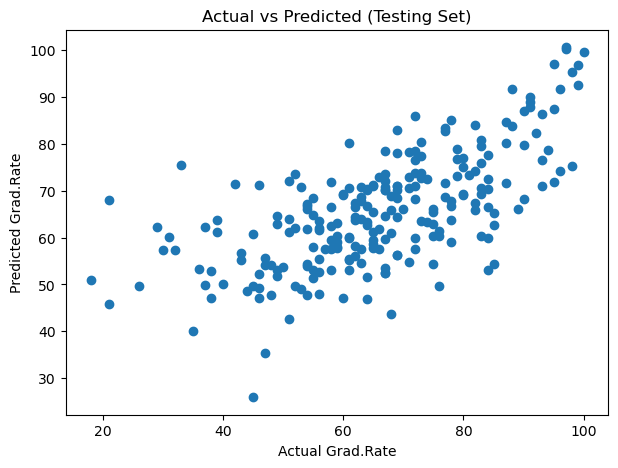

In [30]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Grad.Rate")
plt.ylabel("Predicted Grad.Rate")
plt.title("Actual vs Predicted (Testing Set)")
plt.show()


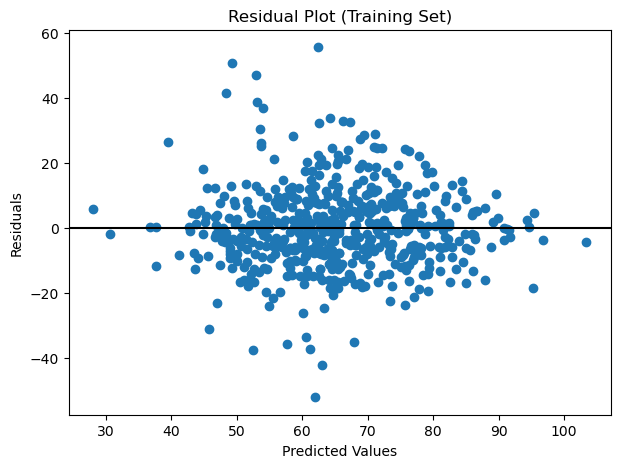

In [31]:
train_residuals = y_train - y_train_pred

plt.figure(figsize=(7,5))
plt.scatter(y_train_pred, train_residuals)
plt.axhline(0, color='black')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Training Set)")
plt.show()


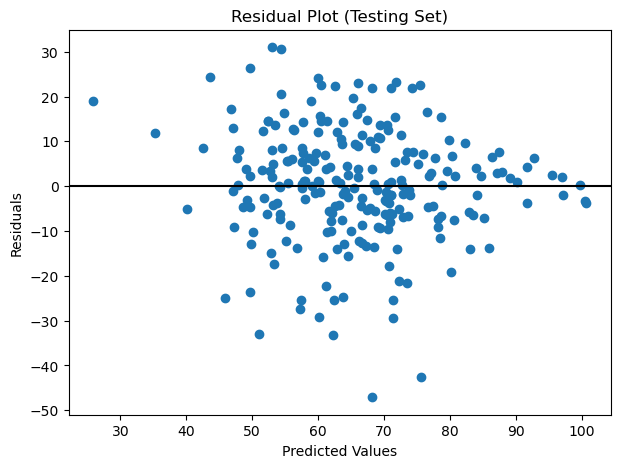

In [32]:
test_residuals = y_test - y_test_pred

plt.figure(figsize=(7,5))
plt.scatter(y_test_pred, test_residuals)
plt.axhline(0, color='black')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Testing Set)")
plt.show()


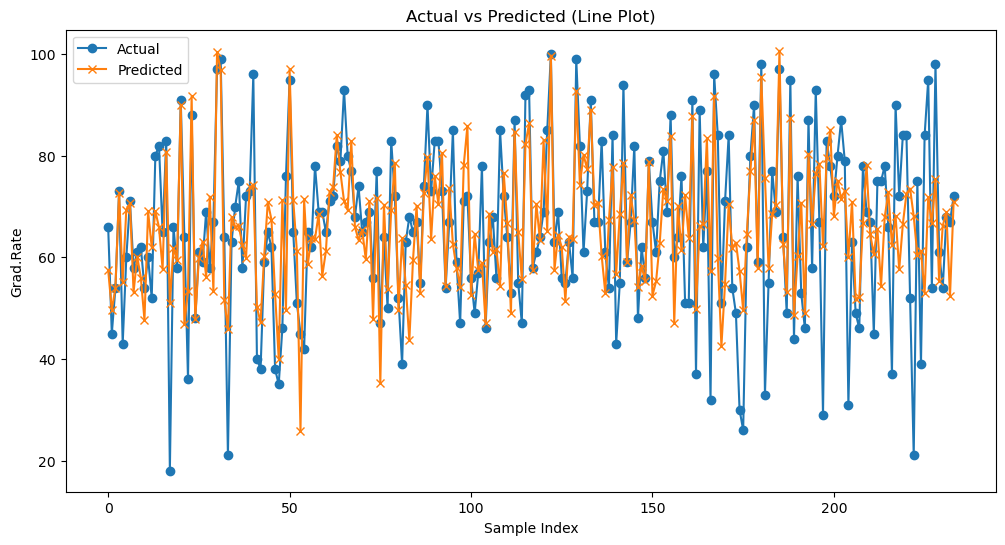

In [33]:
plt.figure(figsize=(12,6))

plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_test_pred, label='Predicted', marker='x')

plt.title("Actual vs Predicted (Line Plot)")
plt.xlabel("Sample Index")
plt.ylabel("Grad.Rate")
plt.legend()
plt.show()


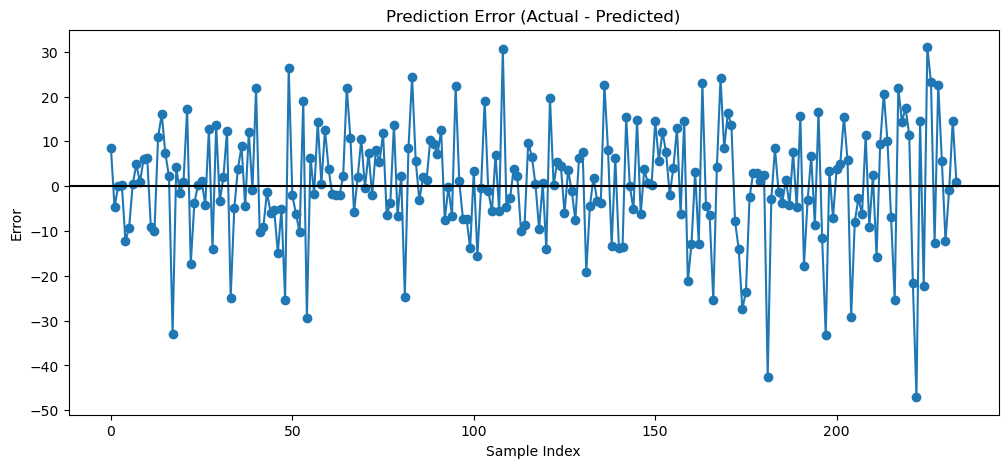

In [34]:
errors = y_test.values - y_test_pred

plt.figure(figsize=(12,5))
plt.plot(errors, marker='o')
plt.axhline(0, color='black')
plt.title("Prediction Error (Actual - Predicted)")
plt.xlabel("Sample Index")
plt.ylabel("Error")
plt.show()


In [35]:
round(df['Grad.Rate'].mean(), 2)


np.float64(65.46)

In [37]:
round(model.intercept_, 2)


np.float64(34.94)

In [38]:
coef = pd.Series(model.coef_, index=X.columns).round(2)
coef.sort_values(ascending=False)


Private_Yes    5.05
perc.alumni    0.34
Top25perc      0.14
PhD            0.14
Top10perc      0.03
Books         -0.00
Expend        -0.00
Personal      -0.00
Apps           0.00
Accept        -0.00
Outstate       0.00
P.Undergrad   -0.00
F.Undergrad   -0.00
Enroll         0.00
Room.Board     0.00
S.F.Ratio     -0.03
Terminal      -0.11
dtype: float64

In [39]:
round(metrics.r2_score(y_train, y_train_pred), 2)

0.46

In [40]:
round(metrics.mean_squared_error(y_test, y_test_pred), 2)


160.48